# Speed Dating Experiment

In [1]:
#Importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importer le dataset
dataset = pd.read_csv("speed_dating_data.csv", encoding= 'unicode_escape')

In [3]:
display(dataset.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Nettoyage des données

In [4]:
#Vérifier les valeurs nulles
dataset.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   int64  
 1   id        8377 non-null   float64
 2   gender    8378 non-null   int64  
 3   idg       8378 non-null   int64  
 4   condtn    8378 non-null   int64  
 5   wave      8378 non-null   int64  
 6   round     8378 non-null   int64  
 7   position  8378 non-null   int64  
 8   positin1  6532 non-null   float64
 9   order     8378 non-null   int64  
 10  partner   8378 non-null   int64  
 11  pid       8368 non-null   float64
 12  match     8378 non-null   int64  
 13  int_corr  8220 non-null   float64
 14  samerace  8378 non-null   int64  
 15  age_o     8274 non-null   float64
 16  race_o    8305 non-null   float64
 17  pf_o_att  8289 non-null   float64
 18  pf_o_sin  8289 non-null   float64
 19  pf_o_int  8289 non-null   float64
 20  pf_o_fun  8280 non-null   flo

> Une majeur partie des valeurs nulles sont issues des préférences des candidats mais aussi de l'age et de l'ethnie du partenaire. On ne peut pas remplacer ses données automatiquement.

In [5]:
#Trouver l'id manquante
null_columns = dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum()

id             1
positin1    1846
pid           10
int_corr     158
age_o        104
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 182, dtype: int64

In [6]:
#Find the mssing 
dataset.loc[(dataset['id'].isnull())]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8377,552,NaN,1,44,2,21,22,2,10.0,15,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [7]:
null_data = {"id": 22.0}
dataset.fillna(value=null_data, limit=1)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


## Mise en forme des données

##### Sexe

In [8]:
#Remplacer 0 et 1 par "Male" et "Female"
dataset["gender"] = dataset["gender"].apply(lambda x : "female" if x == 0
                                                      else "male" )
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,female,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,female,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,female,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,female,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


##### Domaine d'études

In [9]:
dataset["field"].nunique()

259

In [10]:
dataset["field_cd"].nunique()

18

> Il y a 259 domaine d'études répertoriés dans `field` alors qu'il est censé en avoir que 18. Les participants n'ont pas forcéments rempli les questionnaires de la manière, il faudra donc plutôt utilisé `field_cd`.

In [11]:
#Suppression colonne "field"
dataset.drop(["field"],axis=1,inplace=True)

In [12]:
#Remplacer les codes chiffrés par le domaine d'études correspondant
dataset["field_cd"] = dataset["field_cd"].apply(lambda x : "Law" if x == 1.0
                                                        else "Math" if x == 2.0
                                                        else "Social Science" if x == 3.0
                                                        else "Medical Science"  if x == 4.0
                                                        else "Engineering" if x == 5.0
                                                        else "English/Creative Writing" if x == 6.0
                                                        else "History/Religion/Philosophy" if x == 7.0
                                                        else "Business/Econ/Finance" if x == 8.0
                                                        else "Education, Academia" if x == 9.0
                                                        else "Biological Sciences" if x == 10.0
                                                        else "Social Work" if x == 11.0
                                                        else "Undergrad" if x == 12.0
                                                        else "Political Science" if x == 13.0
                                                        else "Film" if x == 14.0
                                                        else "Fine Arts/Arts Administration" if x == 15.0
                                                        else "Languages" if x == 16.0
                                                        else "Architecture" if x == 17.0
                                                        else "Other")

#Colonne "field_co" renommer par "fields"
dataset.rename(columns={"field_cd":"fields"}, inplace=True)
display(dataset["fields"])

0         Law
1         Law
2         Law
3         Law
4         Law
        ...  
8373    Other
8374    Other
8375    Other
8376    Other
8377    Other
Name: fields, Length: 8378, dtype: object

##### Ethnie

In [13]:
dataset["race_o"]

0       2.0
1       2.0
2       4.0
3       2.0
4       3.0
       ... 
8373    3.0
8374    6.0
8375    3.0
8376    4.0
8377    4.0
Name: race_o, Length: 8378, dtype: float64

In [14]:
dataset["race_o"] = dataset["race_o"].apply(lambda x : "African American" if x == 1.0
                                                        else "Caucasian" if x == 2.0
                                                        else "Hispanic" if x == 3.0
                                                        else "Asian"  if x == 4.0
                                                        else "Native American" if x == 5.0
                                                        else "Other" )
dataset.rename(columns={"race_o":"ethnie"}, inplace=True)
display(dataset["ethnie"].head())

0    Caucasian
1    Caucasian
2        Asian
3    Caucasian
4     Hispanic
Name: ethnie, dtype: object

In [15]:
dataset["ethnie"].value_counts(dropna=False)

Caucasian           4722
Asian               1978
Hispanic             664
Other                594
African American     420
Name: ethnie, dtype: int64

In [16]:
dataset.loc[:, ["gender","fields","ethnie"]].head()

,gender,fields,ethnie
0,female,Law,Caucasian
1,female,Law,Caucasian
2,female,Law,Asian
3,female,Law,Caucasian
4,female,Law,Hispanic


## Exploration des données

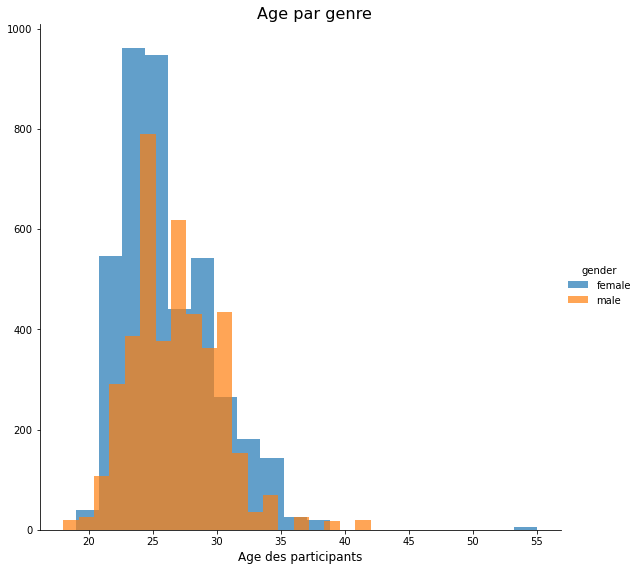

In [17]:
age_hist = sns.FacetGrid(dataset, hue='gender', height = 8)
age_hist.map(plt.hist, "age", alpha= 0.7, bins=20)
age_hist.set_xlabels("Age des participants", fontsize=12)
plt.subplots_adjust(top=0.95)
age_hist.fig.suptitle('Age par genre', fontsize=16)
age_hist.add_legend()

In [18]:
round(dataset[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count']),1)

age                         
        mean median   min   max count
gender                               
female  26.1   26.0  19.0  55.0  4119
male    26.6   27.0  18.0  42.0  4164

> On dirait que les participant hommes ont tendance à être plus vieux que les participantes femmes.

<AxesSubplot:xlabel='ethnie', ylabel='Count'>

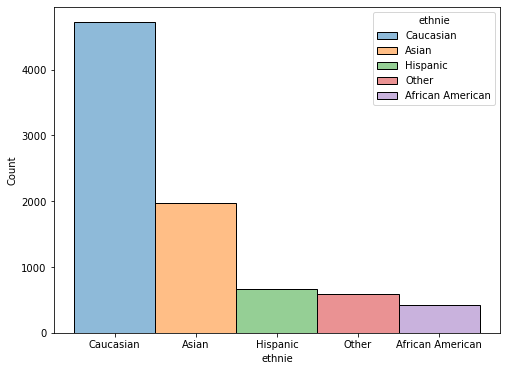

In [19]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.histplot(data=dataset, x="ethnie", hue = "ethnie", ax = ax)

> On dirait qu'il y a plus de participants de type "Caucasian". Ce jeu de données a été compilé par des chercheurs l'université de Colombia, donc on pourrait imaginer qu'ils ont choisi un échantillon représentatif des ethnies de l'Etat de New York. L'ethnie la plus présente de l'état de New York est les Caucasiens à 65,7% 

<AxesSubplot:xlabel='count', ylabel='fields'>

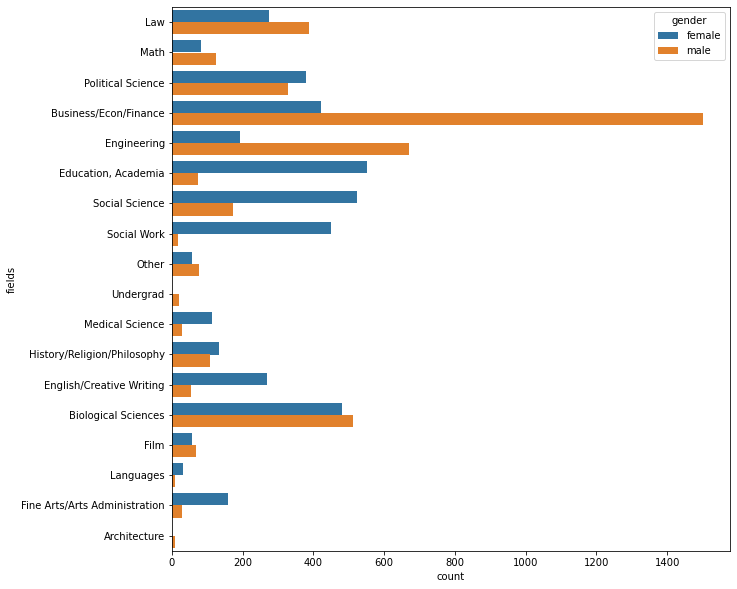

In [20]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot( y="fields", data = dataset, hue="gender", ax = ax)

In [21]:
dataset[["gender", "fields"]].groupby(["fields","gender"]).size().unstack().fillna(0)

gender,female,male
fields,,
Architecture,0.0,10.0
Biological Sciences,482.0,511.0
Business/Econ/Finance,423.0,1502.0
"Education, Academia",553.0,73.0
Engineering,193.0,671.0
English/Creative Writing,270.0,55.0
Film,57.0,69.0
Fine Arts/Arts Administration,158.0,29.0
History/Religion/Philosophy,133.0,108.0


> Il semblerait que les participants hommes ont majoritairement étudiés dans les domaines des Sciences, Economie, Ingénieurie et Droit tandis que les participantes ont majoritairement étudiés dans les domaines des Sciences Sociales, de l'Education, de l'Ecriture et du Social.

## Quels sont les attributs les plus recherchés ?

### Les attributs les plus recherchés par les hommes et les femmes pour un partenaire du sexe opposé

Text(0.5, 1.0, 'Attribut que les Femmes trouvent le plus important chez leurs partenaires Hommes')

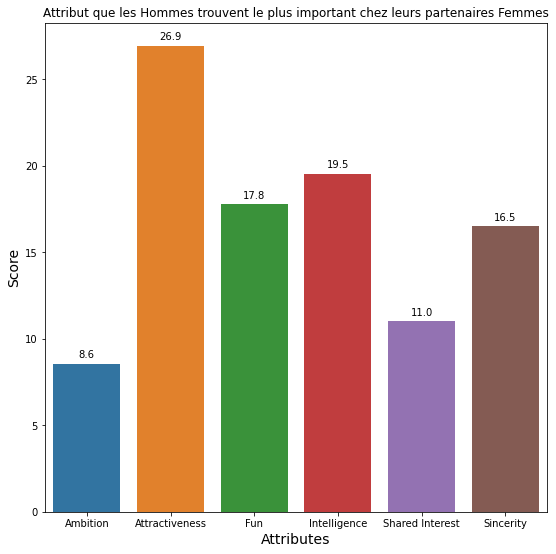

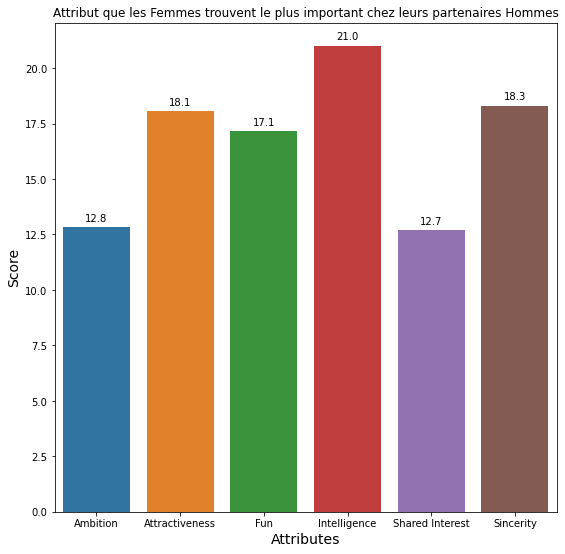

In [98]:
male = dataset.loc[(dataset["gender"]== "male")]
female = dataset.loc[(dataset["gender"]== "female")]

#MEN
male_self = male[["gender","attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1","shar1_1"]]

att = male_self["attr1_1"].mean()
sinc = male_self["sinc1_1"].mean()
intel = male_self["intel1_1"].mean()
fun = male_self["fun1_1"].mean()
amb = male_self["amb1_1"].mean()
shar = male_self["shar1_1"].mean()

    #Creation d'un nouveau dataset pour les préférences des hommes
male_them = {"Attributes": ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition", "Shared Interest"],"Average": [att, sinc, intel, fun, amb, shar]}
male_only = pd.DataFrame(male_them, columns = ["Attributes", "Average"])

#WOMEN
female_self = female[["gender","attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1","shar1_1"]]
att_f = female_self["attr1_1"].mean()
sinc_f = female_self["sinc1_1"].mean()
intel_f = female_self["intel1_1"].mean()
fun_f = female_self["fun1_1"].mean()
amb_f = female_self["amb1_1"].mean()
shar_f = female_self["shar1_1"].mean()

    #Creation d'un nouveau dataset pour les préférences des femmes
female_them = {"Attributes": ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition", "Shared Interest"],"Average": [att_f, sinc_f, intel_f, fun_f, amb_f, shar_f]}
female_only = pd.DataFrame(female_them, columns = ["Attributes", "Average"])

#Création des histogrammes
fig = male_only.groupby("Attributes").sum()
fig.reset_index(inplace=True)
plt.figure(figsize=(9, 9))
fig_men = sns.barplot(x="Attributes", y="Average", data=fig)
for p in fig_men.patches:
    fig_men.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Attributes", size=14)
plt.ylabel("Score", size=14)
fig_men.set_title("Attribut que les Hommes trouvent le plus important chez leurs partenaires Femmes")


fig_f = female_only.groupby("Attributes").sum()
fig_f.reset_index(inplace=True)
plt.figure(figsize=(9, 9))
fig_women = sns.barplot(x="Attributes", y="Average", data=fig_f)
for p in fig_women.patches:
    fig_women.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Attributes", size=14)
plt.ylabel("Score", size=14)
fig_women.set_title("Attribut que les Femmes trouvent le plus important chez leurs partenaires Hommes")


### Les attributs recherchés par le sexe opposé d'après les hommes/femmes

Text(0.5, 1.0, 'Attribut que les Femmes pensent que les Hommes recherchent le plus chez une Femmes')

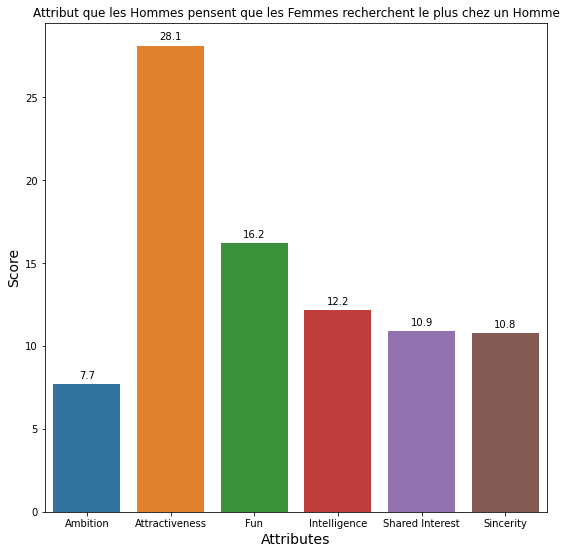

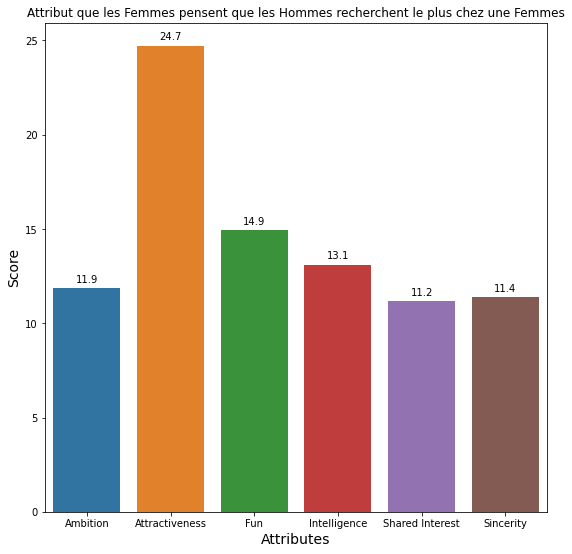

In [104]:
#### MEN
male_self = male[["gender","attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1","shar4_1"]]

att = male_self["attr4_1"].mean()
sinc = male_self["sinc4_1"].mean()
intel = male_self["intel4_1"].mean()
fun = male_self["fun4_1"].mean()
amb = male_self["amb4_1"].mean()
shar = male_self["shar4_1"].mean()

    #Creation d'un nouveau dataset pour les préférences des hommes
male_them = {"Attributes": ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition", "Shared Interest"],"Average": [att, sinc, intel, fun, amb, shar]}
male_only = pd.DataFrame(male_them, columns = ["Attributes", "Average"])

#WOMEN
female_self = female[["gender","attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1","shar4_1"]]
att_f = female_self["attr4_1"].mean()
sinc_f = female_self["sinc4_1"].mean()
intel_f = female_self["intel4_1"].mean()
fun_f = female_self["fun4_1"].mean()
amb_f = female_self["amb4_1"].mean()
shar_f = female_self["shar4_1"].mean()

    #Creation d'un nouveau dataset pour les préférences des femmes
female_them = {"Attributes": ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition", "Shared Interest"],"Average": [att_f, sinc_f, intel_f, fun_f, amb_f, shar_f]}
female_only = pd.DataFrame(female_them, columns = ["Attributes", "Average"])

#Création des histogrammes
fig = male_only.groupby("Attributes").sum()
fig.reset_index(inplace=True)
plt.figure(figsize=(9, 9))
fig_men = sns.barplot(x="Attributes", y="Average", data=fig)
for p in fig_men.patches:
    fig_men.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Attributes", size=14)
plt.ylabel("Score", size=14)
fig_men.set_title("Attribut que les Hommes pensent que les Femmes recherchent le plus chez un Homme")


fig_f = female_only.groupby("Attributes").sum()
fig_f.reset_index(inplace=True)
plt.figure(figsize=(9, 9))
fig_women = sns.barplot(x="Attributes", y="Average", data=fig_f)
for p in fig_women.patches:
    fig_women.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Attributes", size=14)
plt.ylabel("Score", size=14)
fig_women.set_title("Attribut que les Femmes pensent que les Hommes recherchent le plus chez une Femmes")
